The `GetMembers` method returns the ***members of a type***.

In [1]:
using System.Reflection;

class Walnut
{
    private bool cracked;
    public void Crack() { cracked = true; }
}

MemberInfo[] members = typeof (Walnut).GetMembers();
foreach (MemberInfo m in members)
    Console.WriteLine (m);

Void Crack()
System.Type GetType()
System.String ToString()
Boolean Equals(System.Object)
Int32 GetHashCode()
Void .ctor()


When called ***with no arguments***, `GetMembers` returns ***all the public members*** for a type (and its **base types**).

`GetMember` retrieves a `specific member by name`, it still returns ***an array*** because members can be `overloaded`

In [2]:
MemberInfo[] m = typeof (Walnut).GetMember ("Crack");
Console.WriteLine (m[0]);

Void Crack()


`MemberInfo` also has a ***property*** called `MemberType` of type MemberTypes.

This is a `flags enum` with these values:
  
- `All` 
- `Custom` 
- `Field` 
- `NestedType` 
- `TypeInfo`
- `Constructor` 
- `Event` 
- `Method` 
- `Property`

When calling `GetMembers`, you can ***pass*** in a `MemberTypes` instance to restrict the kinds of members that it returns. **Alternatively**, you can restrict the result set by calling `GetMethods`, `GetFields`, `GetProperties`, `GetConstructors`, or `GetNestedTypes`.

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn; border:1px solid rgb(226, 197, 65); padding: 10px">
<h3 style="text-align:center">
<svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" fill="none" viewBox="0 0 24 24" class="icon-md" style="color: rgb(118, 208, 235);"><path fill="currentColor" fill-rule="evenodd" d="M12.455 4.105a1 1 0 0 0-.91 0L1.987 8.982 1.077 7.2l9.56-4.877a3 3 0 0 1 2.726 0l9.56 4.877A1.98 1.98 0 0 1 24 9.22V15a1 1 0 1 1-2 0v-3.784l-2.033.995v4.094a3 3 0 0 1-1.578 2.642l-4.967 2.673a3 3 0 0 1-2.844 0l-4.967-2.673a3 3 0 0 1-1.578-2.642v-4.094l-2.927-1.433C-.374 10.053-.39 7.949 1.077 7.2l.91 1.782 9.573 4.689a1 1 0 0 0 .88 0L22 8.989v-.014zM6.033 13.19v3.114a1 1 0 0 0 .526.88l4.967 2.674a1 1 0 0 0 .948 0l4.967-2.673a1 1 0 0 0 .526-.88V13.19l-4.647 2.276a3 3 0 0 1-2.64 0z" clip-rule="evenodd"></path></svg>
 Reflecting Members with TypeInfo</h3>

 <p> دو روش مختلف برای واکشی اعضای یک نوع (مانند متدها، پراپرتی‌ها و سازنده‌ها) اشاره شده است:</p>
<ol><li><strong>روش سنتی با استفاده از متد GetMembers</strong>: این متد یک آرایه از تمام اعضا (شامل متدها، پراپرتی‌ها و غیره) برمی‌گرداند که شامل اعضای ارث‌برده‌شده از کلاس پایه هم می‌شود.</li><li><strong>روش استفاده از TypeInfo</strong>: این روش به‌جای استفاده از متدهایی مانند GetMembers که آرایه بازمی‌گردانند، از خواصی استفاده می‌کند که IEnumerable&lt;T&gt; را بازمی‌گردانند و معمولاً برای فیلتر کردن داده‌ها از LINQ استفاده می‌شود. مثلاً خواص <code>DeclaredMembers</code> فقط اعضای تعریف‌شده در همان کلاس را بدون ارث‌برده‌شده‌ها برمی‌گرداند.</li></ol>

<p>خواص <code>DeclaringType</code> و <code>ReflectedType</code> هم اشاره به تفاوت بین کلاسی که عضو در آن تعریف شده است (DeclaringType) و کلاسی که روی آن reflection انجام شده (ReflectedType) دارد. این دو زمانی که روی عضوی که در کلاس پایه تعریف شده باشد و در کلاس فرزند استفاده شود، می‌توانند تفاوت داشته باشند.</p>

<p>به‌طور خلاصه، TypeInfo یک روش انعطاف‌پذیرتر و ساده‌تر برای کار با reflection ارائه می‌دهد، مخصوصاً در مواردی که نیاز به استفاده از LINQ دارید.</p>
</div>

In [3]:
class Walnut
{
    private bool cracked;
    public void Crack() { cracked = true; }
}

IEnumerable<MemberInfo> members =
    typeof(Walnut).GetTypeInfo().DeclaredMembers;

foreach (MemberInfo m in members)
    Console.WriteLine (m);

Void Crack()
Void .ctor()
Boolean cracked


In [ ]:
MethodInfo method = typeof (int)
    .GetTypeInfo().DeclaredMethods
    .FirstOrDefault (m => m.Name == "ToString" &&
                          m.GetParameters().Length == 0);

In [ ]:
// MethodInfo is a subclass of MemberInfo;
MethodInfo test = typeof (Program).GetMethod ("ToString");
MethodInfo obj = typeof (object) .GetMethod ("ToString");

Console.WriteLine (test.DeclaringType); // System.Object
Console.WriteLine (obj.DeclaringType); // System.Object

Console.WriteLine (test.ReflectedType); // Program
Console.WriteLine (obj.ReflectedType); // System.Object

Console.WriteLine (test == obj); // False

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<p><code>Console.WriteLine(test.DeclaringType);</code>:</p>
<ul><li><strong>خروجی:</strong> <code>System.Object</code></li><li><strong>چرا؟</strong> زیرا متد <code>ToString</code> در کلاس پایه <code>System.Object</code> تعریف شده است. هرچند شما این متد را روی نوع <code>Program</code> بازتاب داده‌اید، اما <code>DeclaringType</code> نشان می‌دهد که متد در اصل در کدام کلاس تعریف شده است. از آنجا که <code>ToString</code> در کلاس <code>object</code> تعریف شده، خروجی <code>System.Object</code> است.</li></ul>

<p>وقتی از متد <code>GetMethod</code> برای دریافت اطلاعات یک متد استفاده می‌کنید، ویژگی <code>ReflectedType</code> مشخص می‌کند که عملیات reflection روی چه نوعی انجام شده است. در این مورد:</p>

<ol><li><code>test</code> از نوع <code>Program</code> است و reflection روی کلاس <code>Program</code> انجام شده است، پس وقتی <code>ReflectedType</code> را چاپ می‌کنید، نتیجه <code>Program</code> است.</li><li><code>obj</code> از نوع <code>object</code> است و شما عملیات reflection را روی کلاس <code>object</code> انجام داده‌اید، بنابراین <code>ReflectedType</code> برابر با <code>System.Object</code> خواهد بود.</li></ol>
</div>

### Member Types

`MemberInfo` itself is light on members because it’s ***an abstract base*** for the **other types**

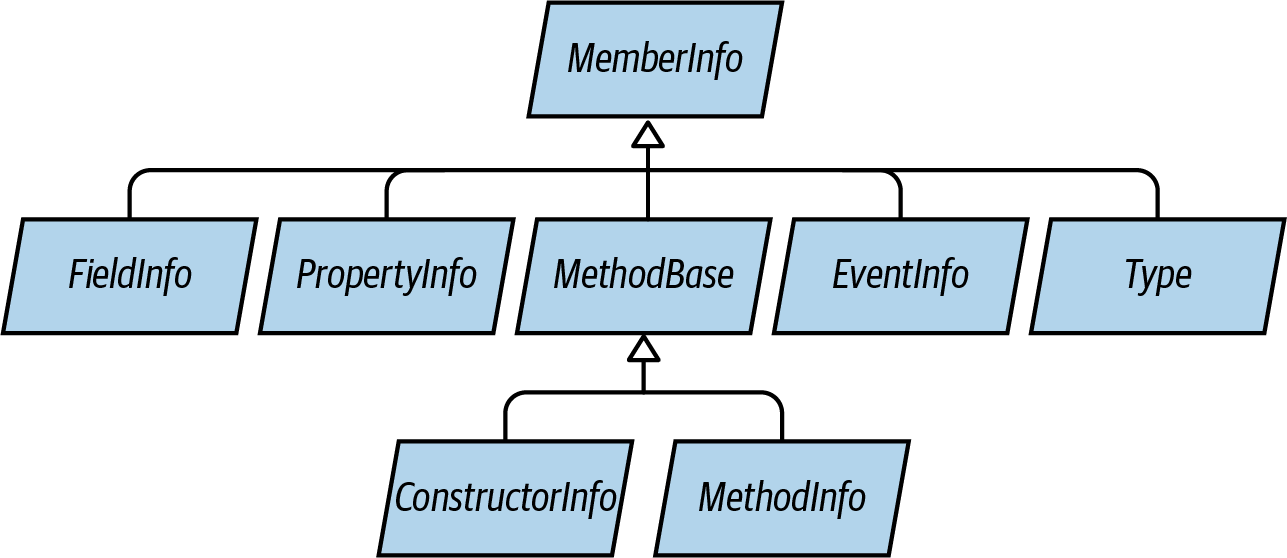

You can `cast` a ***MemberInfo*** to its ***subtype***, based on its `MemberType` property.

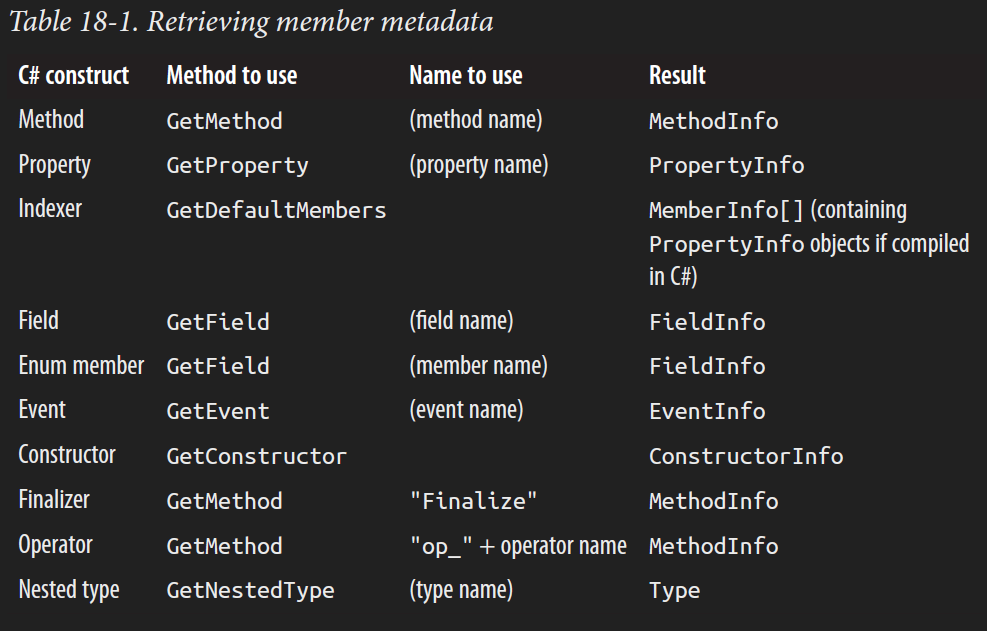

### C# Members Versus CLR Members

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<p> برخی از ساختارهای زبان C# با ساختارهای سیستم اصلی نوع‌ها (CLR) مطابقت دارند یا ندارند. CLR (Common Language Runtime) بخشی از .NET است که به همه زبان‌های .NET (مانند C#، Visual Basic و ...) امکان تعامل با یکدیگر را می‌دهد. API بازتاب (Reflection API) نیز بر پایه‌ی CLR طراحی شده و امکان بررسی و دسترسی به ساختارهای کد را در زمان اجرا فراهم می‌کند. اما برخی از ساختارهای زبان C# در CLR به شکل متفاوتی ترجمه می‌شوند. </p>

<h5>1. <strong>ساختارهای C# که معادل دقیق در CLR ندارند:</strong></h5>
<p>بعضی از ویژگی‌ها و ساختارهای زبان C# به‌صورت مستقیم در CLR وجود ندارند و ترجمه می‌شوند:</p>
<ul><li><p><strong>Indexer (اندیس‌گذارها):</strong>
در C#، اندیس‌گذار به شما اجازه می‌دهد تا به یک شیء با استفاده از یک یا چند آرگومان دسترسی پیدا کنید (مانند آرایه‌ها). اما در CLR، اندیس‌گذار در واقع به‌عنوان یک property با یک یا چند آرگومان ترجمه می‌شود و به‌عنوان [DefaultMember] برای آن نوع مشخص می‌شود.</p></li><li><p><strong>Enum (شمارش‌ها):</strong>
شمارش‌های C# به یک زیرنوع از <code>System.Enum</code> ترجمه می‌شوند که دارای یک فیلد استاتیک برای هر عضو شمارش است.</p></li><li><p><strong>Operators (عملگرها):</strong>
عملگرهای تعریف‌شده در C# به متدهای استاتیک خاصی در CLR تبدیل می‌شوند. این متدها با پیشوند <code>op_</code> شروع می‌شوند. برای مثال، عملگر <code>+</code> به متدی با نام <code>op_Addition</code> ترجمه می‌شود.</p></li><li><p><strong>Finalizers (نهایی‌کننده‌ها):</strong>
نهایی‌کننده‌ها (متدهای <code>~ClassName</code> در C#) به متدی که متد <code>Finalize</code> را در CLR بازنویسی می‌کند، تبدیل می‌شوند.</p></li></ul>

<h5>2. <strong>خواص و رویدادها (Properties and Events):</strong></h5>
<p>خواص (Properties) و رویدادها (Events) نیز در CLR به یک شکل ساده ترجمه نمی‌شوند. آن‌ها در واقع از دو بخش تشکیل شده‌اند:</p>
<ul><li><strong>Metadata (فراداده):</strong> این بخش شامل توصیف خواص و رویدادها است و توسط کلاس‌هایی مانند <code>PropertyInfo</code> و <code>EventInfo</code> کپسوله می‌شود.</li><li><strong>Backing Methods (متدهای پشت‌زمینه):</strong> هر property یا event به یک یا دو متد پشت‌زمینه ترجمه می‌شود (مانند متدهای getter و setter برای خواص).</li></ul>
</div>

In [6]:
class Test { public int X { get { return 0; } set {} } }

foreach (MethodInfo mi in typeof (Test).GetMethods())
    Console.WriteLine (mi.Name + " ");


get_X 
set_X 
GetType 
ToString 
Equals 
GetHashCode 


<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<h5>متدهای پشت‌زمینه چیست؟</h5>
<p>در C#، وقتی شما یک property (خاصیت) یا event (رویداد) تعریف می‌کنید، کامپایلر به‌طور خودکار متدهایی برای دسترسی و تغییر مقدار آن‌ها ایجاد می‌کند. به این متدها <strong>متدهای پشت‌زمینه</strong> (backing methods) گفته می‌شود:</p>
<ul><li>برای یک property معمولاً دو متد وجود دارد: <strong>getter</strong> و <strong>setter</strong>.</li><li>برای یک event متدهایی برای افزودن یا حذف event handlers وجود دارد.</li><li>این متدها به‌طور ضمنی و مخفیانه در کد شما وجود دارند، اما هنگام کامپایل به IL، این متدها به‌عنوان <strong>متدهای عادی</strong> تولید می‌شوند که می‌توان آن‌ها را مثل متدهای دیگر فراخوانی کرد.</li></ul>
<h5>تأثیر در Reflection:</h5>
<p>در reflection (بازتاب)، وقتی شما از متد <code>GetMethods</code> استفاده می‌کنید، متدهای پشت‌زمینه propertyها و eventها نیز به‌عنوان متدهای عادی در لیست برگردانده می‌شوند. به این معنی که متدهایی که توسط کامپایلر ایجاد شده‌اند، همراه با متدهای معمولی نمایش داده می‌شوند.</p>
<h5>تشخیص متدهای پشت‌زمینه:</h5>
<p>برای اینکه بتوانید متدهای پشت‌زمینه را از متدهای عادی تشخیص دهید، می‌توانید از ویژگی <code>IsSpecialName</code> در <code>MethodInfo</code> استفاده کنید.</p>
<ul><li><strong><code>IsSpecialName</code> چه می‌کند؟</strong>
این ویژگی مشخص می‌کند که آیا یک متد خاصیت یا رفتار خاصی دارد یا نه. اگر <code>IsSpecialName</code> برابر <code>true</code> باشد، یعنی این متد یکی از موارد زیر است:<ul><li><strong>متدهای پشت‌زمینه propertyها و eventها</strong> (مثل <code>getter</code> و <code>setter</code>).</li><li><strong>متدهای پشت‌زمینه indexerها</strong>.</li><li><strong>متدهای عملگرهای تعریف‌شده (مثل <code>op_Addition</code>)</strong>.</li><li><strong>متدهای پشت‌زمینه finalizerها (مثل <code>~ClassName</code>)</strong>.</li></ul></li></ul>
<h5>خروجی:</h5>
<p>متد <code>IsSpecialName</code> فقط برای متدهای معمولی C# و متد <code>Finalize</code> در صورتی که finalizer تعریف شده باشد، مقدار <strong>false</strong> برمی‌گرداند. بنابراین، اگر بخواهید متدهای معمولی را از متدهای پشت‌زمینه جدا کنید، می‌توانید از این ویژگی استفاده کنید.</p>

</div>

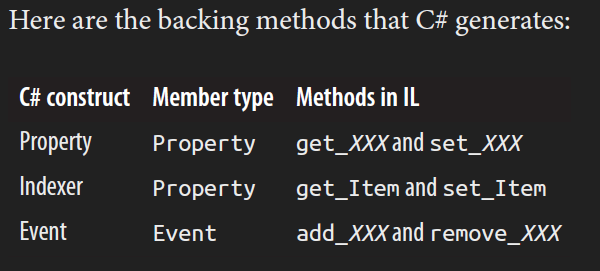

In [ ]:
PropertyInfo pi = typeof (Console).GetProperty ("Title");
MethodInfo getter = pi.GetGetMethod(); // get_Title
MethodInfo setter = pi.GetSetMethod(); // set_Title
MethodInfo[] both = pi.GetAccessors(); // Length==2

`GetAddMethod` and `GetRemoveMethod` perform a **similar job** for `EventInfo`.

#### Init-only properties

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<p> از دیدگاه CLR (Common Language Runtime)، این ویژگی‌ها تفاوت خاصی با set accessor های عادی ندارند؛ بلکه یک <strong>پرچم (flag)</strong> مخصوص روی روش set قرار می‌گیرد که به کامپایلر C# معنی خاصی می‌دهد. نکته جالب این است که این پرچم به جای استفاده از یک attribute مرسوم، از مکانیزمی به نام <strong>modreq</strong> استفاده می‌کند.</p>

<h3>Modreq چیست؟</h3>
<p>Modreq (یا <strong>modifier requirement</strong>) به نوعی پارامتر سفارشی اشاره دارد که به متد اضافه می‌شود. این باعث می‌شود که نسخه‌های قبلی کامپایلر C# که از این مکانیزم جدید اطلاع ندارند، به‌جای اینکه این ویژگی را به عنوان قابل نوشتن (writable) تلقی کنند، آن را <strong>نادیده بگیرند</strong>.</p>
<h3>IsExternalInit</h3>
<p>در این مورد خاص، modreq برای ویژگی‌های init-only <strong>IsExternalInit</strong> نامیده می‌شود. شما می‌توانید از طریق reflection آن را چک کنید و ببینید که آیا یک ویژگی init-only است یا خیر. کدی که در مثال داده شده، از reflection برای بررسی این موضوع استفاده می‌کند:</p>
</div>

In [ ]:
bool IsInitOnly (PropertyInfo pi) => pi
.GetSetMethod().ReturnParameter.GetRequiredCustomModifiers()
.Any (t => t.Name == "IsExternalInit");

### Generic Type Members

You can obtain ***member metadata*** for both `unbound` and `closed` **generic** types:

In [1]:
using System.Reflection;

PropertyInfo unbound = typeof (IEnumerator<>) .GetProperty ("Current");
PropertyInfo closed = typeof (IEnumerator<int>).GetProperty ("Current");

Console.WriteLine (unbound); // T Current
Console.WriteLine (closed); // Int32 Current

Console.WriteLine (unbound.PropertyType.IsGenericParameter); // True
Console.WriteLine (closed.PropertyType.IsGenericParameter); // False

T Current
Int32 Current
True
False


<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<p><strong>MemberInfo</strong> اشیایی که برای unbound و closed generic types بازمی‌گردند، <strong>همیشه متمایز (distinct)</strong> هستند، حتی اگر امضای متدهایشان یکسان باشد.</p>
</div>

In [ ]:
using System.Reflection;

PropertyInfo unbound = typeof(List<>).GetProperty("Count");
PropertyInfo closed = typeof(List<int>).GetProperty("Count");

Console.WriteLine(unbound); // Int32 Count
Console.WriteLine(closed); // Int32 Count

Console.WriteLine(unbound == closed); // False 
//توابع متمایز هستند


In [ ]:
//بررسی جنریک بودن DeclaringType

Console.WriteLine(unbound.DeclaringType.IsGenericTypeDefinition); // True
Console.WriteLine(closed.DeclaringType.IsGenericTypeDefinition); // False


<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<ul><li><strong>Members of unbound generic types cannot be dynamically invoked</strong>: به این معنا که شما نمی‌توانید متدهای مربوط به <strong>unbound generic types</strong> را به صورت دینامیک (با استفاده از reflection) فراخوانی کنید، زیرا این نوع‌ها هنوز پارامترهای جنریک خود را مشخص نکرده‌اند.</li></ul>
</div>

### Dynamically Invoking a Member

After you have a `MethodInfo`, `PropertyInfo`, or `FieldInfo` object, you can ***dynamically*** `call it` or `get/set its value`.

In [3]:
using System.Reflection;

object s = "Hello";
PropertyInfo prop = s.GetType().GetProperty ("Length");
int length = (int) prop.GetValue (s, null); // 5

Console.WriteLine(length);

5


`GetValue` and `SetValue` get and set the value of a `PropertyInfo` or `FieldInfo`.

To `dynamically call` a ***method***, call `Invoke` on a `MethodInfo`, providing an ***array of arguments*** to pass to that method.

### Method Parameters

In [ ]:
Type type = typeof (string);
Type[] parameterTypes = { typeof (int) };
MethodInfo method = type.GetMethod ("Substring", parameterTypes);

object[] arguments = { 2 };
object returnValue = method.Invoke ("stamp", arguments);
Console.WriteLine (returnValue);

Because the ***Substring*** method is `overloaded`, we had to pass an `array of parameter types` to GetMethod to indicate ***which version we wanted***.

In [4]:
//The GetParameters method, returns parameter metadata.

Type type = typeof (string);
Type[] parameterTypes = { typeof (int) };
MethodInfo method = type.GetMethod ("Substring", parameterTypes);

ParameterInfo[] paramList = method.GetParameters();
foreach (ParameterInfo x in paramList)
{
    Console.WriteLine (x.Name); // startIndex
    Console.WriteLine (x.ParameterType); // System.Int32
}

startIndex
System.Int32


#### Dealing with ref and out parameters

In [ ]:
int x;
bool successfulParse = int.TryParse ("23", out x);

object[] args = { "23", 0 };
Type[] argTypes = { typeof (string), typeof (int).MakeByRefType() };
MethodInfo tryParse = typeof (int).GetMethod ("TryParse", argTypes);
bool successfulParseDynamic = (bool) tryParse.Invoke (null, args);

This same approach works for both `ref` and out parameter types.

### Using Delegates for Performance

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">

<p>روش‌های پویا (dynamic invocations) به دلیل استفاده از reflection و نیاز به انجام عملیات late binding، معمولاً کند هستند و سرباری در حدود چند میکروثانیه دارند. این امر در صورتی که یک متد به دفعات در یک حلقه فراخوانی شود، می‌تواند به یک مشکل کارایی تبدیل شود.</p>
</div>

In [ ]:
using System.Reflection;

MethodInfo trimMethod = typeof (string).GetMethod ("Trim", new Type[0]);

var trim = (StringToString) Delegate.CreateDelegate
                (typeof (StringToString), trimMethod);

for (int i = 0; i < 1000000; i++)
    trim ("test");

delegate string StringToString (string s);

### Accessing Nonpublic Members

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<p>
دسترسی به اعضای غیردسترسی‌پذیر (private) کلاس‌ها با استفاده از reflection امکان پذیر است، این قابلیت انعطاف زیادی به برنامه‌نویسان می‌دهد، اما می‌تواند خطرناک باشد چون اصول کپسوله‌سازی (encapsulation) را نقض می‌کند.
</p>
</div>

In [ ]:
using System.Reflection;

class Walnut
{
    private bool cracked;
    public void Crack() { cracked = true; }
    public override string ToString() { return cracked.ToString(); }
}

Type t = typeof (Walnut);
Walnut w = new Walnut();

w.Crack();
FieldInfo f = t.GetField ("cracked", BindingFlags.NonPublic | BindingFlags.Instance);

f.SetValue (w, false);
Console.WriteLine (w); // False

#### The BindingFlags enum

***BindingFlags*** is intended to be bitwise-combined.  
  
```
BindingFlags.Public | BindingFlags.Instance
BindingFlags.Public | BindingFlags.Static
BindingFlags.NonPublic | BindingFlags.Instance
BindingFlags.NonPublic | BindingFlags.Static

```

`NonPublic` includes ***internal***, ***protected***, ***protected internal***, and ***private***.

In [ ]:
using System.Reflection;

BindingFlags publicStatic = BindingFlags.Public | BindingFlags.Static;
MemberInfo[] members = typeof (object).GetMembers (publicStatic);

BindingFlags nonPublicBinding =
    BindingFlags.NonPublic | BindingFlags.Static | BindingFlags.Instance;
MemberInfo[] members1 = typeof (object).GetMembers (nonPublicBinding);

The ***DeclaredOnly*** flag `excludes` functions ***inherited from base types***, `unless they are overridden`.

### Generic Methods

You `cannot` ***directly*** `invoke generic methods`;

In [ ]:
using System.Reflection;

MethodInfo echo = typeof (Program).GetMethod ("Echo");
Console.WriteLine (echo.IsGenericMethodDefinition); // True
echo.Invoke (null, new object[] { 123 } ); // Exception

public static T Echo<T> (T x) { return x; }

An ***extra step*** is required, which is to **call** `MakeGenericMethod` on the `MethodInfo`

In [ ]:
using System.Reflection;

MethodInfo echo = typeof (Program).GetMethod ("Echo");
MethodInfo intEcho = echo.MakeGenericMethod (typeof (int));
Console.WriteLine (intEcho.IsGenericMethodDefinition); // False
Console.WriteLine (intEcho.Invoke (null, new object[] { 3 } )); // 3

### Anonymously Calling Members of a Generic Interface

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<p> وقتی شما در زمان اجرای برنامه (runtime) با یک نوع عمومی روبرو می‌شوید و نمی‌دانید پارامترهای نوع (type parameters) دقیقاً چه هستند، می‌توانید از reflection استفاده کنید تا به طور ناشناس به اعضای یک رابط عمومی (generic interface) دسترسی پیدا کنید.</p>

<p>مثال مطرح شده در متن این است که ما می‌خواهیم نسخه‌ای پیشرفته‌تر از متد <strong>ToString</strong> بنویسیم که می‌تواند نتیجه کوئری‌های LINQ را گسترش دهد. این متد باید بتواند انواع مختلف از (collections) را پیمایش کند، اما نوع (generic type) می‌تواند پیچیده باشد و شامل (nested collections) باشد.</p>
</div>

In [ ]:
public static string ToStringEx <T> (IEnumerable<T> sequence)
{
    //...
}

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<p>اما این روش محدود است، چون فقط می‌تواند یک سطح از کلکسیون‌ها را مدیریت کند. اگر توالی شامل کلکسیون‌های تو در تو باشد (مثلاً <strong>IEnumerable&lt;IEnumerable&lt;T&gt;&gt;</strong>)، باید متد را اضافه کنیم تا با این حالت هم کار کند:</p>
</div>

In [ ]:
public static string ToStringEx <T> (IEnumerable<IEnumerable<T>> sequence)
{
    //...
}


<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<p>این رویکرد با استفاده از <strong>overloading</strong> (تعریف چندین متد با امضای متفاوت) برای هر نوع خاص یا هر نوع تو در تو به سرعت غیر عملی می‌شود. مخصوصاً زمانی که نوع‌های پیچیده‌تری مثل <strong>groupings</strong> (گروه‌بندی‌ها) یا <strong>projections</strong> (پروژکشن‌های توالی‌ها) وارد بازی می‌شوند. در این حالت، متدهای استاتیک و اضافه بار کردن (overloading) نمی‌توانند به خوبی این تنوع را پوشش دهند.</p>
</div>

In [ ]:
using System.Reflection;

public static string ToStringEx (object value)
{
    if (value == null) return "<null>";
    if (value.GetType().IsPrimitive) return value.ToString();

    StringBuilder sb = new StringBuilder();

    if (value is IList)
        sb.Append ("List of " + ((IList)value).Count + " items: ");

    Type closedIGrouping = value.GetType().GetInterfaces()
        .Where (t => t.IsGenericType &&
            t.GetGenericTypeDefinition() == typeof (IGrouping<,>))
        .FirstOrDefault();

    if (closedIGrouping != null) // Call the Key property on IGrouping<,>
    {
        PropertyInfo pi = closedIGrouping.GetProperty ("Key");
        object key = pi.GetValue (value, null);
        sb.Append ("Group with key=" + key + ": ");
    }

    if (value is IEnumerable)
        foreach (object element in ((IEnumerable)value))
            sb.Append (ToStringEx (element) + " ");

    if (sb.Length == 0) sb.Append (value.ToString());
    
    return "\r\n" + sb.ToString();
}